In [ ]:
!nvidia-smi

Wed Jan  3 14:18:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install -q transformers[sentencepiece] ohmeow-blurr fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 991.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [ ]:
import json
import torch
from fastai.text.all import *
from blurr.text.data.all import *
from transformers import AutoConfig
from blurr.text.modeling.all import *
from transformers import AutoModelForSequenceClassification

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning: The repository for squad contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/squad/squad.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/keyword_generation/

/content/drive/MyDrive/keyword_generation


In [ ]:
encoding_path = "encoding"
import json

In [ ]:
file = open(f"{encoding_path}/encoded_keywords.json")
encoded_keywords = json.load(file)

In [ ]:
encoded_keywords

{'internet of things': 0,
 'privacy': 1,
 'blockchain': 2,
 'machine learning': 3,
 'prediction algorithms': 4,
 'biological system modeling': 5,
 'security': 6,
 '5g mobile communication': 7,
 'cloud computing': 8,
 'wireless communication': 9,
 'wireless sensor networks': 10,
 'antenna arrays': 11,
 'bandwidth': 12,
 'imaging': 13,
 'remote sensing': 14,
 'computational modeling': 15,
 'neural networks': 16,
 'task analysis': 17,
 'predictive models': 18,
 'deep learning': 19,
 'training': 20,
 'testing': 21,
 'support vector machines': 22,
 'databases': 23,
 'artificial intelligence': 24,
 'logic gates': 25,
 'servers': 26,
 'computer architecture': 27,
 'feature extraction': 28,
 'optimization': 29,
 'data mining': 30,
 'real-time systems': 31,
 'convergence': 32,
 'convolution': 33,
 'convolutional neural networks': 34,
 'optical fiber communication': 35,
 'radio frequency': 36,
 'modulation': 37,
 'algorithm design and analysis': 38,
 'data models': 39,
 'monitoring': 40,
 'time 

In [ ]:
labels = list(encoded_keywords.keys())

**RoBERTa** -> roberta-base

In [ ]:
model_name = "roberta-base"

model_cls = AutoModelForSequenceClassification

config = AutoConfig.from_pretrained(model_name)

config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls = model_cls, config = config)

config.problem_type = "multi_label_classification"


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
dataloader_path = "dataloaders"

RoBERTa -> **roberta_base_0.003.pkl**

In [ ]:
dls = torch.load(f"{dataloader_path}/roberta_base_0.003.pkl")

In [ ]:
model = BaseModelWrapper(hf_model)

In [ ]:
learner = Learner(
    dls,
    model,
    opt_func = partial(Adam),
    cbs = [BaseModelCallback],
    splitter = blurr_splitter,
    loss_func = BCEWithLogitsLossFlat(),
    metrics = [partial(accuracy_multi, thresh=0.5)],
).to_fp16()

In [ ]:
learner.freeze()

SuggestedLRs(slide=0.0012022644514217973, valley=0.00010964782268274575)

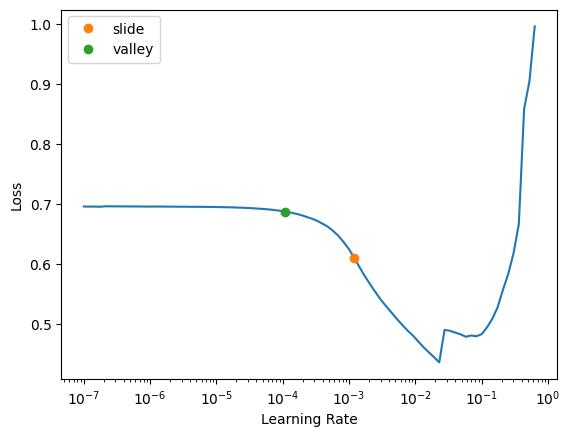

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(5,slice(1.5e-4,1.5e-3))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.063254,0.062097,0.982301,07:44
1,0.056306,0.055157,0.983693,07:56
2,0.053804,0.051441,0.984235,08:00
3,0.050403,0.049151,0.984679,07:56
4,0.047306,0.048536,0.984829,07:57


In [ ]:
learner.save('roberta_freezed')

Path('models/roberta_freezed.pth')

In [ ]:
learner.load('roberta_freezed')

In [ ]:
learner.export('models/roberta.pkl')

In [ ]:
learner.unfreeze()

In [ ]:
set_seed(42)

SuggestedLRs(slide=0.0030199517495930195, valley=1.2022644114040304e-05)

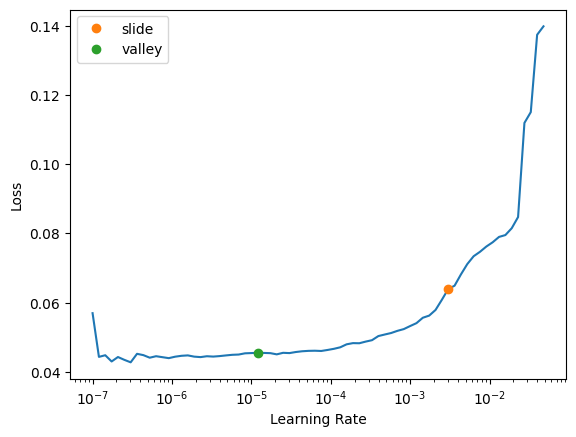

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(5, slice(3e-5,5e-3))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.089617,0.091477,0.981818,10:50
1,0.089773,0.089218,0.981818,10:34


In [ ]:
learner.save('roberta_unfreezed')

In [ ]:
learner.export('models/roberta_v1.pkl')